<a href="https://colab.research.google.com/github/AbhilashaAjmera/trader-performance/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()  # Opens a file picker

Saving fear_greed_index.csv to fear_greed_index.csv


In [2]:
import pandas as pd
import numpy as np
fg = pd.read_csv('fear_greed_index.csv')
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
from google.colab import files

uploaded = files.upload()  # Opens a file picker


Saving historical_data.csv to historical_data.csv


In [5]:
hd = pd.read_csv('historical_data.csv')
hd.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
fg['date'] = pd.to_datetime(fg['date'], format='%Y-%m-%d')
hd['Timestamp IST'] = pd.to_datetime(hd['Timestamp IST'], format='%d-%m-%Y %H:%M')
hd['trade_date'] = hd['Timestamp IST'].dt.date
fg['sentiment_date'] = fg['date'].dt.date

In [7]:
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}
fg['sentiment_score'] = fg['classification'].map(sentiment_map)

In [8]:
fear_greed_df = fg[['sentiment_date','sentiment_score', 'classification']]
historical_data_df = hd[['Account','Coin','Execution Price','Size Tokens','Size USD','Side','Closed PnL','Direction','trade_date']]

In [9]:
final = pd.merge(
    historical_data_df,
    fear_greed_df,
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)
final.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,sentiment_date,sentiment_score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed


In [10]:
final.to_csv('final.csv', index=False)

In [11]:
#profit and loss
final['Prof/loss'] = final['Closed PnL'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else 'Zero'))

In [12]:
final['Side_Binary'] = final['Side'].apply(lambda x : 1 if str(x).upper() == 'BUY' else 0)
# Trade Result
final['Trade_Result'] = final['Size USD']
# Normalize
final['Closed'] = historical_data_df['Closed PnL']
final['Normalized_PnL'] = final.apply(
    lambda row : row['Closed'] / row['Size USD'] if row['Size USD'] else 0, axis=1
)

In [13]:
final[['Account', 'trade_date', 'Side', 'Side_Binary', 'Size USD',
           'Closed', 'Prof/loss', 'Trade_Result', 'Normalized_PnL','sentiment_score','classification']].head()

,Account,trade_date,Side,Side_Binary,Size USD,Closed,Prof/loss,Trade_Result,Normalized_PnL,sentiment_score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,7872.16,0.0,Zero,7872.16,0.0,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,127.68,0.0,Zero,127.68,0.0,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,1150.63,0.0,Zero,1150.63,0.0,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,1142.04,0.0,Zero,1142.04,0.0,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,69.75,0.0,Zero,69.75,0.0,4.0,Extreme Greed


In [14]:
daily_account_stats = (
    final
    .groupby(['Account', 'trade_date', 'classification', 'sentiment_score'], as_index=False)
    .agg(
        Total_PnL=('Closed', 'sum'),
        Avg_PnL=('Closed', 'mean'),
        Total_Trade_Size=('Size USD', 'sum'),
        Avg_Trade_Size=('Size USD', 'mean'),
        Buy_Ratio=('Side_Binary', 'mean'),
        Profit_Trades=('Prof/loss', lambda x: (x == 'Profit').sum()),
        Total_Trades=('Account', 'count')
    )
)

# Add derived column to calculate profit percent
daily_account_stats['Profit_Rate'] = (
    daily_account_stats['Profit_Trades'] / daily_account_stats['Total_Trades']
)

# Show results
daily_account_stats.head()


,Account,trade_date,classification,sentiment_score,Total_PnL,Avg_PnL,Total_Trade_Size,Avg_Trade_Size,Buy_Ratio,Profit_Trades,Total_Trades,Profit_Rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,4.0,0.0,0.000000,900880.13,5089.718249,0.000000,0,177,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,4.0,0.0,0.000000,542413.18,7976.664412,0.000000,0,68,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,4.0,0.0,0.000000,949380.00,23734.500000,0.000000,0,40,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,4.0,-21227.0,-1768.916667,338240.00,28186.666667,1.000000,0,12,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,4.0,1603.1,59.374074,465700.00,17248.148148,0.444444,12,27,0.444444


/tmp/ipython-input-2951211878.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_account_stats, x='classification', y='Avg_PnL', palette='coolwarm', showfliers=False)
/tmp/ipython-input-2951211878.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


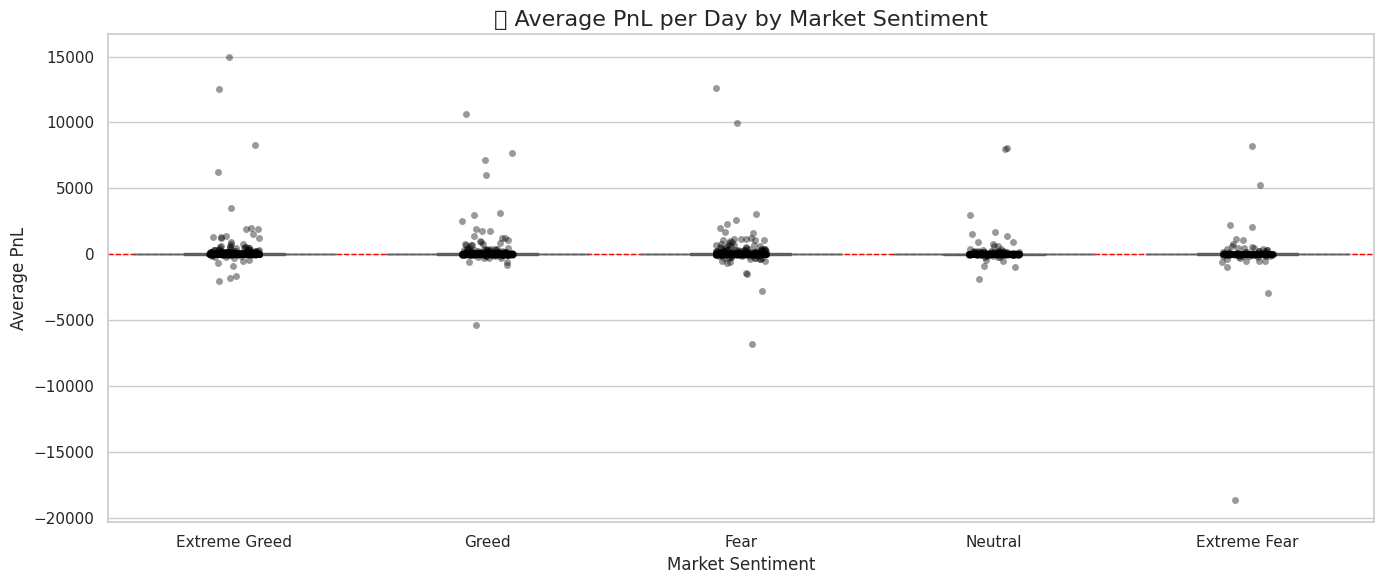

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

#  Distribution of Avg PnL by Sentiment (Boxplot + Mean Marker)
plt.figure()
sns.boxplot(data=daily_account_stats, x='classification', y='Avg_PnL', palette='coolwarm', showfliers=False)
sns.stripplot(data=daily_account_stats, x='classification', y='Avg_PnL', color='black', alpha=0.4, jitter=True)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('📊 Average PnL per Day by Market Sentiment', fontsize=16)
plt.ylabel('Average PnL')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4236413447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=daily_account_stats, x='classification', y='Profit_Rate', palette='viridis', inner=None)
/tmp/ipython-input-4236413447.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=daily_account_stats, x='classification', y='Profit_Rate', color='black', join=False, estimator='mean', markers='D', ci=None)
/tmp/ipython-input-4236413447.py:4: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=daily_account_stats, x='classification', y='Profit_Rate', color='black', join=False, estimator='mean', markers='D', ci=None)
/tmp/ipython-input-4236413447.py:8: UserWarning: Glyph 128200 (\N{

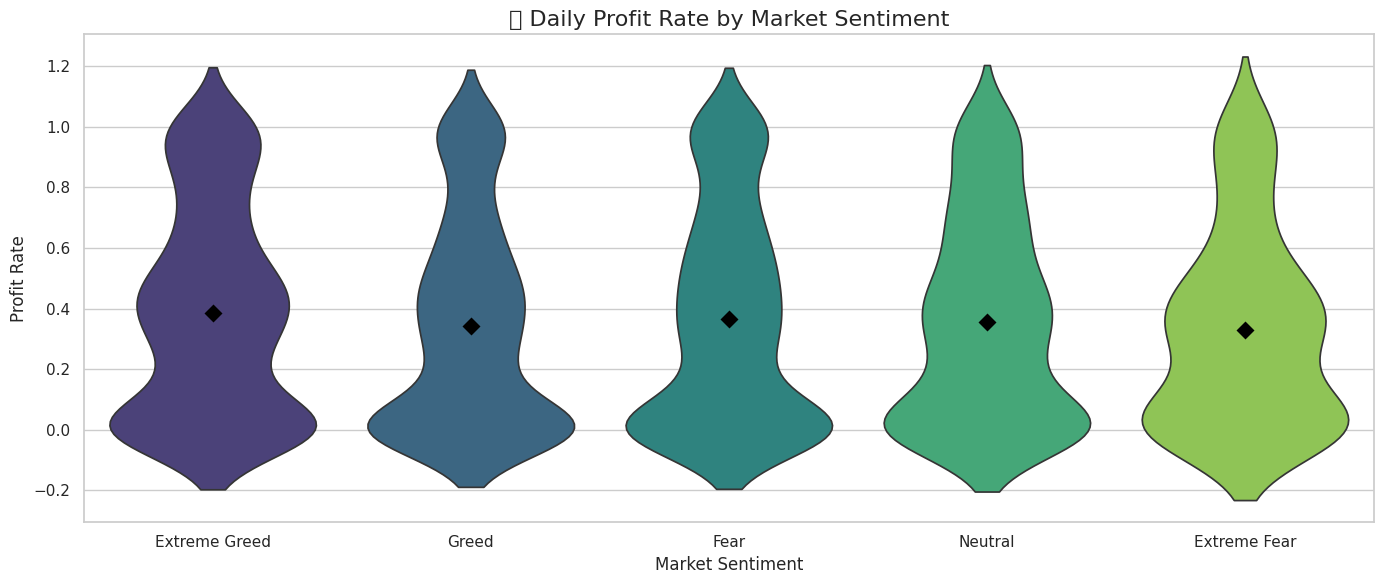

In [16]:
#  Profit Rate by Sentiment (Violin Plot + Mean)
plt.figure()
sns.violinplot(data=daily_account_stats, x='classification', y='Profit_Rate', palette='viridis', inner=None)
sns.pointplot(data=daily_account_stats, x='classification', y='Profit_Rate', color='black', join=False, estimator='mean', markers='D', ci=None)
plt.title('📈 Daily Profit Rate by Market Sentiment', fontsize=16)
plt.ylabel('Profit Rate')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1307064000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_account_stats, x='classification', y='Buy_Ratio', palette='Set2', showfliers=False)
/tmp/ipython-input-1307064000.py:8: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


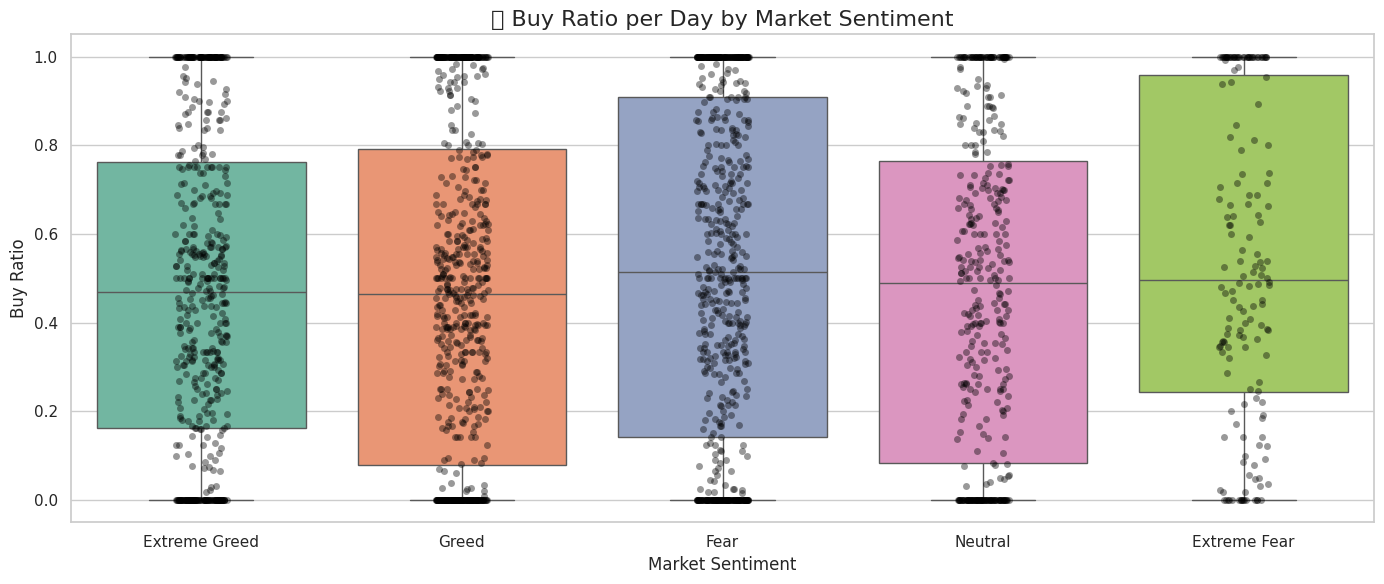

In [17]:
#  Buy Ratio by Sentiment (Swarm Plot for Distribution)
plt.figure()
sns.boxplot(data=daily_account_stats, x='classification', y='Buy_Ratio', palette='Set2', showfliers=False)
sns.stripplot(data=daily_account_stats, x='classification', y='Buy_Ratio', color='black', alpha=0.4, jitter=True)
plt.title('🛒 Buy Ratio per Day by Market Sentiment', fontsize=16)
plt.ylabel('Buy Ratio')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3904641722.py:9: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


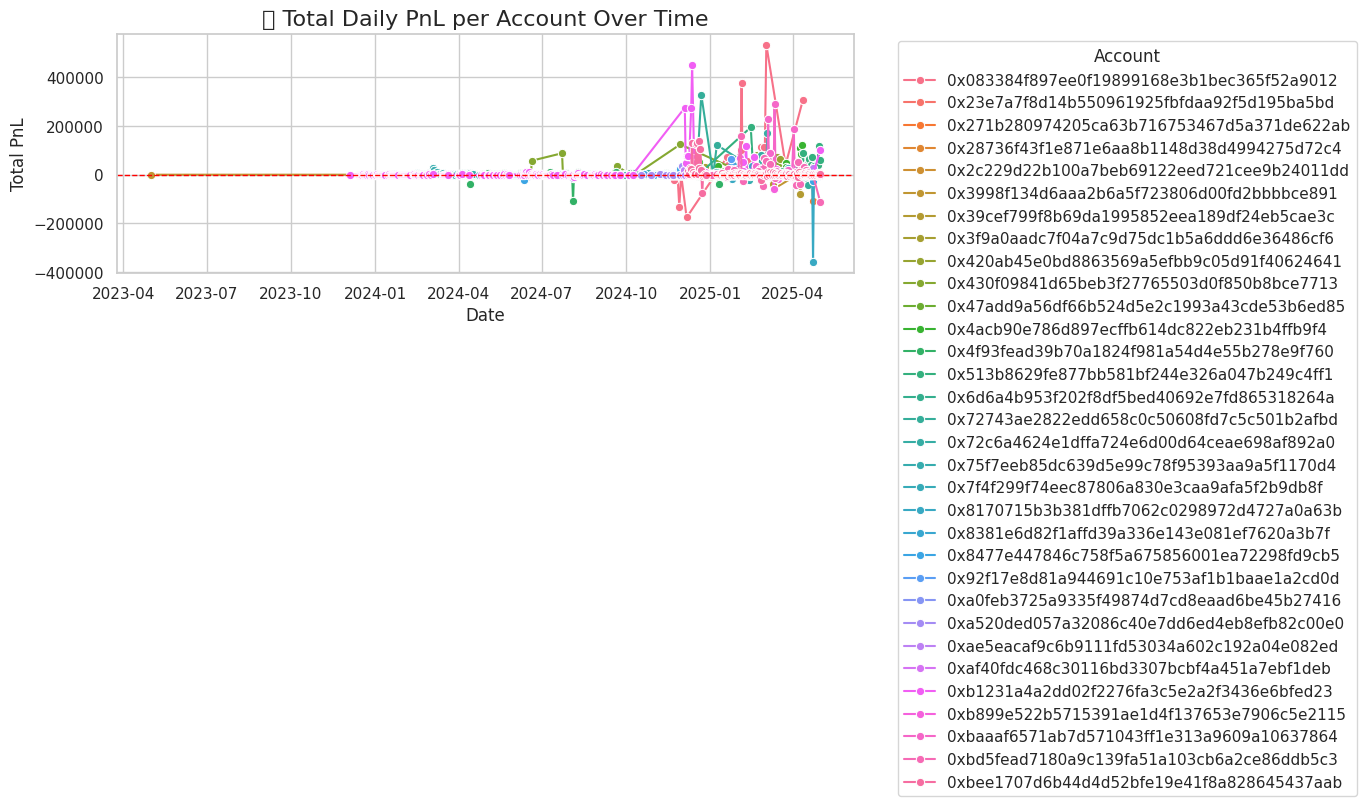

In [18]:
#  Time-Series of Total PnL per Account
plt.figure(figsize=(14,6))
sns.lineplot(data=daily_account_stats, x='trade_date', y='Total_PnL', hue='Account', marker='o')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('📆 Total Daily PnL per Account Over Time', fontsize=16)
plt.ylabel('Total PnL')
plt.xlabel('Date')
plt.legend(title='Account', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4047557646.py:10: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


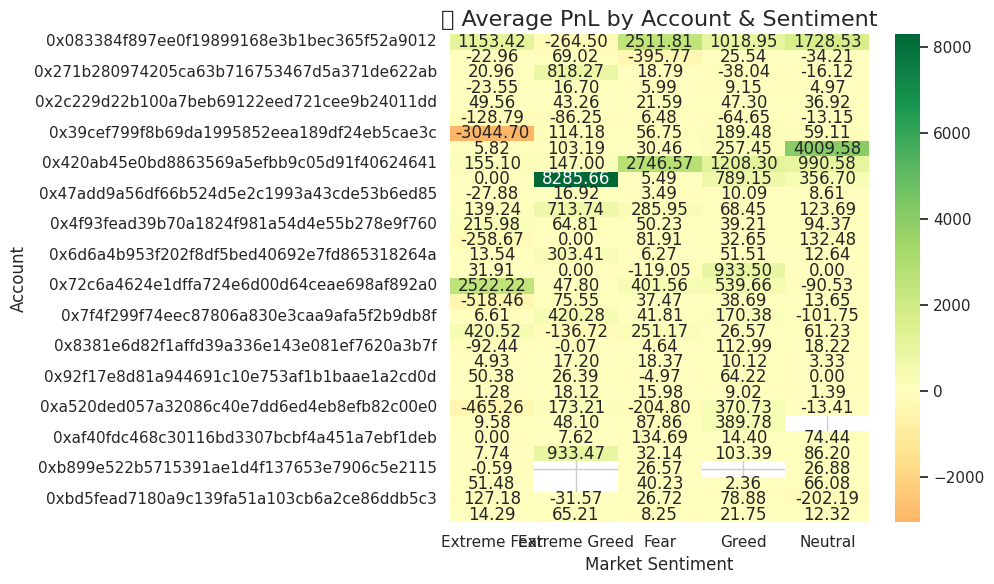

In [19]:
#  Heatmap: Average PnL by Account vs. Sentiment
pivot_table = daily_account_stats.pivot_table(
    index='Account', columns='classification', values='Avg_PnL', aggfunc='mean'
)
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='RdYlGn', center=0)
plt.title('🔥 Average PnL by Account & Sentiment', fontsize=16)
plt.ylabel('Account')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2075980097.py:13: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


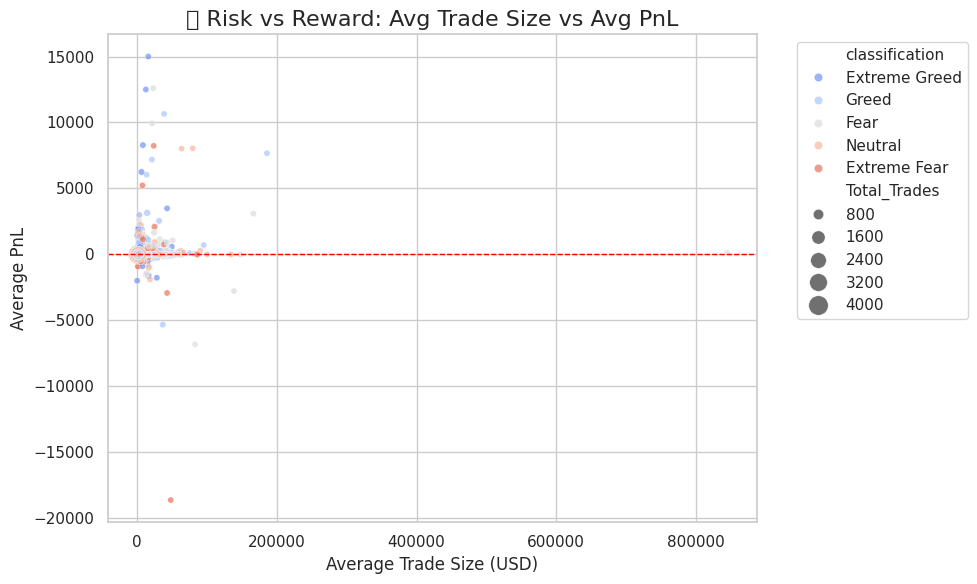

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=daily_account_stats,
    x='Avg_Trade_Size', y='Avg_PnL',
    hue='classification', size='Total_Trades', sizes=(20, 200),
    palette='coolwarm', alpha=0.7
)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('💸 Risk vs Reward: Avg Trade Size vs Avg PnL', fontsize=16)
plt.xlabel('Average Trade Size (USD)')
plt.ylabel('Average PnL')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-330149398.py:24: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


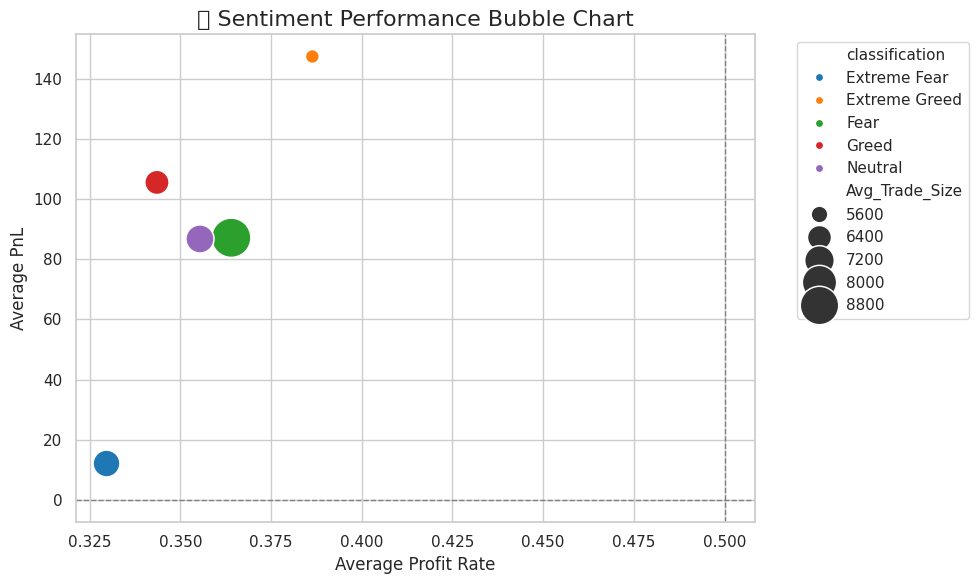

In [22]:
sentiment_summary = (
    daily_account_stats.groupby('classification')
    .agg(
        Avg_Profit_Rate=('Profit_Rate', 'mean'),
        Avg_PnL=('Avg_PnL', 'mean'),
        Avg_Trade_Size=('Avg_Trade_Size', 'mean')
    )
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=sentiment_summary,
    x='Avg_Profit_Rate', y='Avg_PnL',
    size='Avg_Trade_Size', sizes=(100, 800),
    hue='classification', palette='tab10', legend='brief'
)
plt.title('🔵 Sentiment Performance Bubble Chart', fontsize=16)
plt.xlabel('Average Profit Rate')
plt.ylabel('Average PnL')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0.5, color='gray', linestyle='--', linewidth=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2734466948.py:7: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


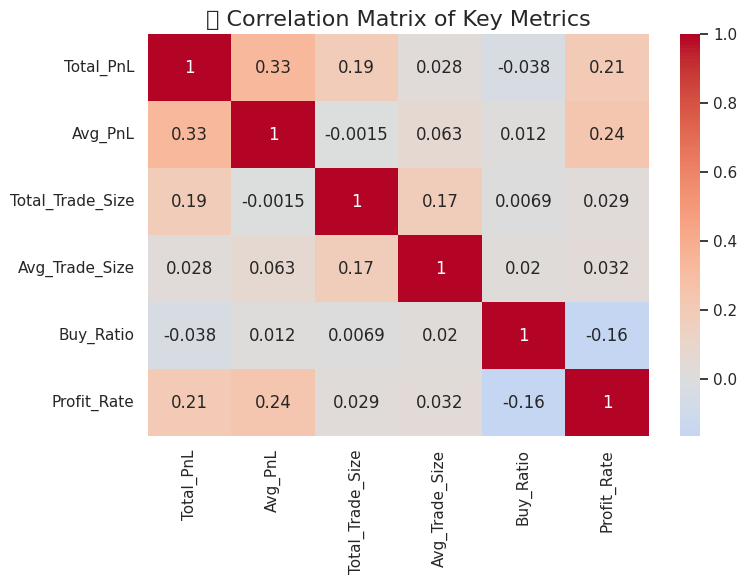

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(
    daily_account_stats[['Total_PnL','Avg_PnL','Total_Trade_Size','Avg_Trade_Size','Buy_Ratio','Profit_Rate']]
    .corr(), annot=True, cmap='coolwarm', center=0
)
plt.title('🔗 Correlation Matrix of Key Metrics', fontsize=16)
plt.tight_layout()
plt.show()